## Carregando bibliotecas:

In [150]:
import pandas            as pd 
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.linear_model    import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn                 import preprocessing

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Carregando a base de dados:

In [151]:
df = pd.read_csv("SAheart.data")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Convertendo atributo categórico em numérico:

In [152]:
le = preprocessing.LabelEncoder()
df[['famhist']]  = le.fit_transform(df[['famhist']])

display(df.head())

C:\Users\cv\.conda\envs\modulo2\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Analisar percentual de dados faltantes

In [153]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentual = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percentual], axis=1, keys=['Total','Percentual'])

In [154]:
missing_data(df)

,Total,Percentual
chd,0,0.0
age,0,0.0
alcohol,0,0.0
obesity,0,0.0
typea,0,0.0
famhist,0,0.0
adiposity,0,0.0
ldl,0,0.0
tobacco,0,0.0
sbp,0,0.0


## Analisar percentual de valores iguais a zero

In [155]:
def zero_entries(df):
    total = df.isin([0]).sum().sort_values(ascending = False)
    percentual = round(df.isin([0]).sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percentual], axis=1, keys=['Total','Percentual'])

In [156]:
zero_entries(df)

,Total,Percentual
chd,302,65.37
famhist,270,58.44
alcohol,110,23.81
tobacco,107,23.16
age,0,0.00
obesity,0,0.00
typea,0,0.00
adiposity,0,0.00
ldl,0,0.00
sbp,0,0.00


## Conclusão: Não há dados faltantes nem valores iguais a zero erroneamente.

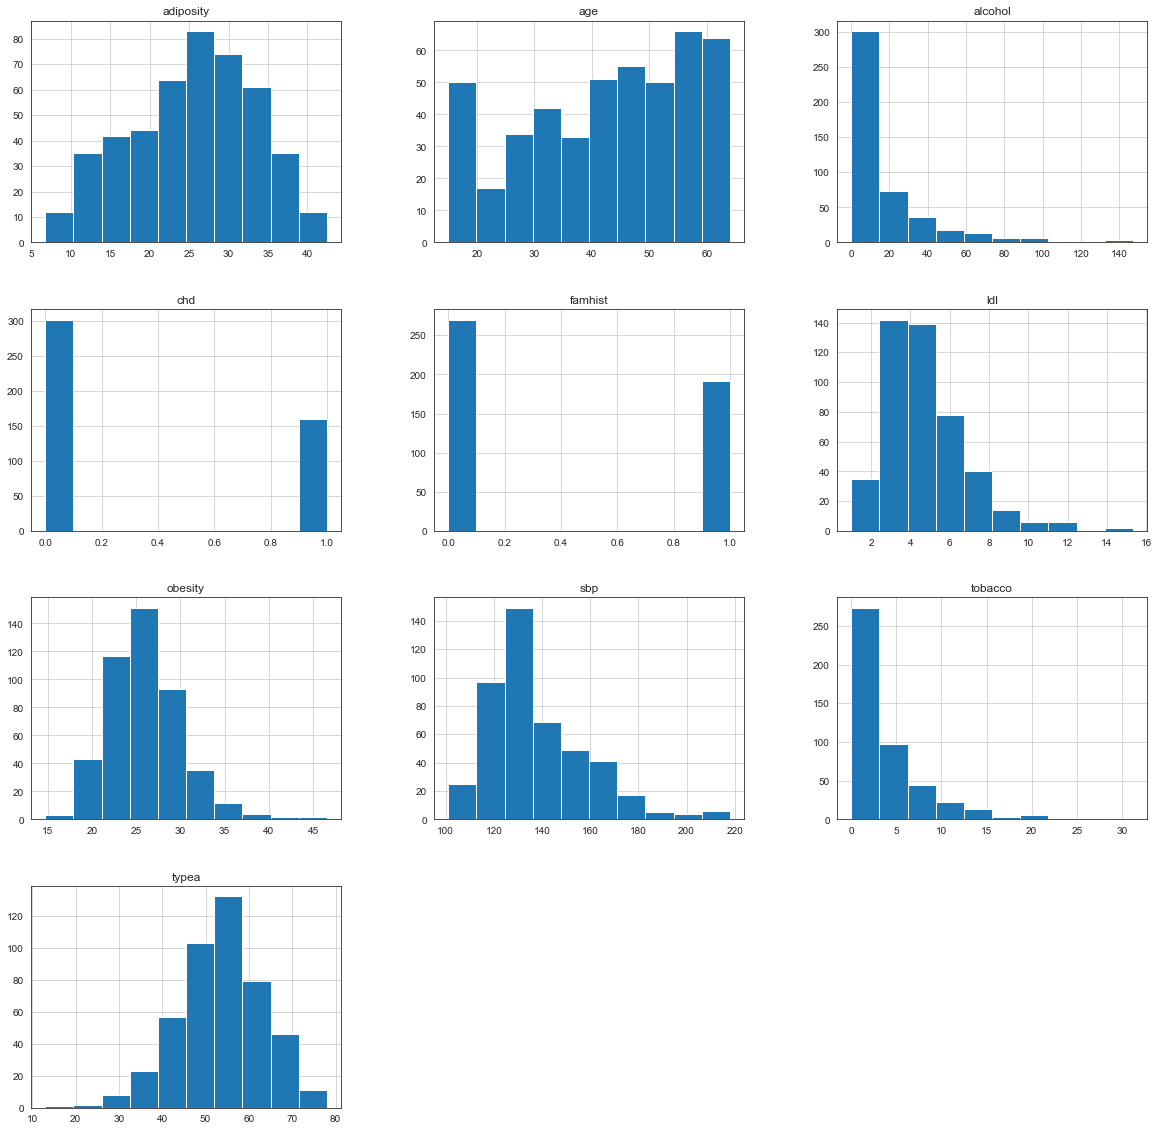

In [157]:
p = df.hist(figsize = (20,20))

## Analisando a proporção entre resultados da variável a ser predita

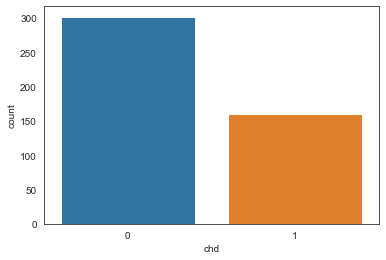

In [158]:
sns.countplot(x='chd',data=df)

## Conclusão: Não há uma proporção equilibrada entre os valores

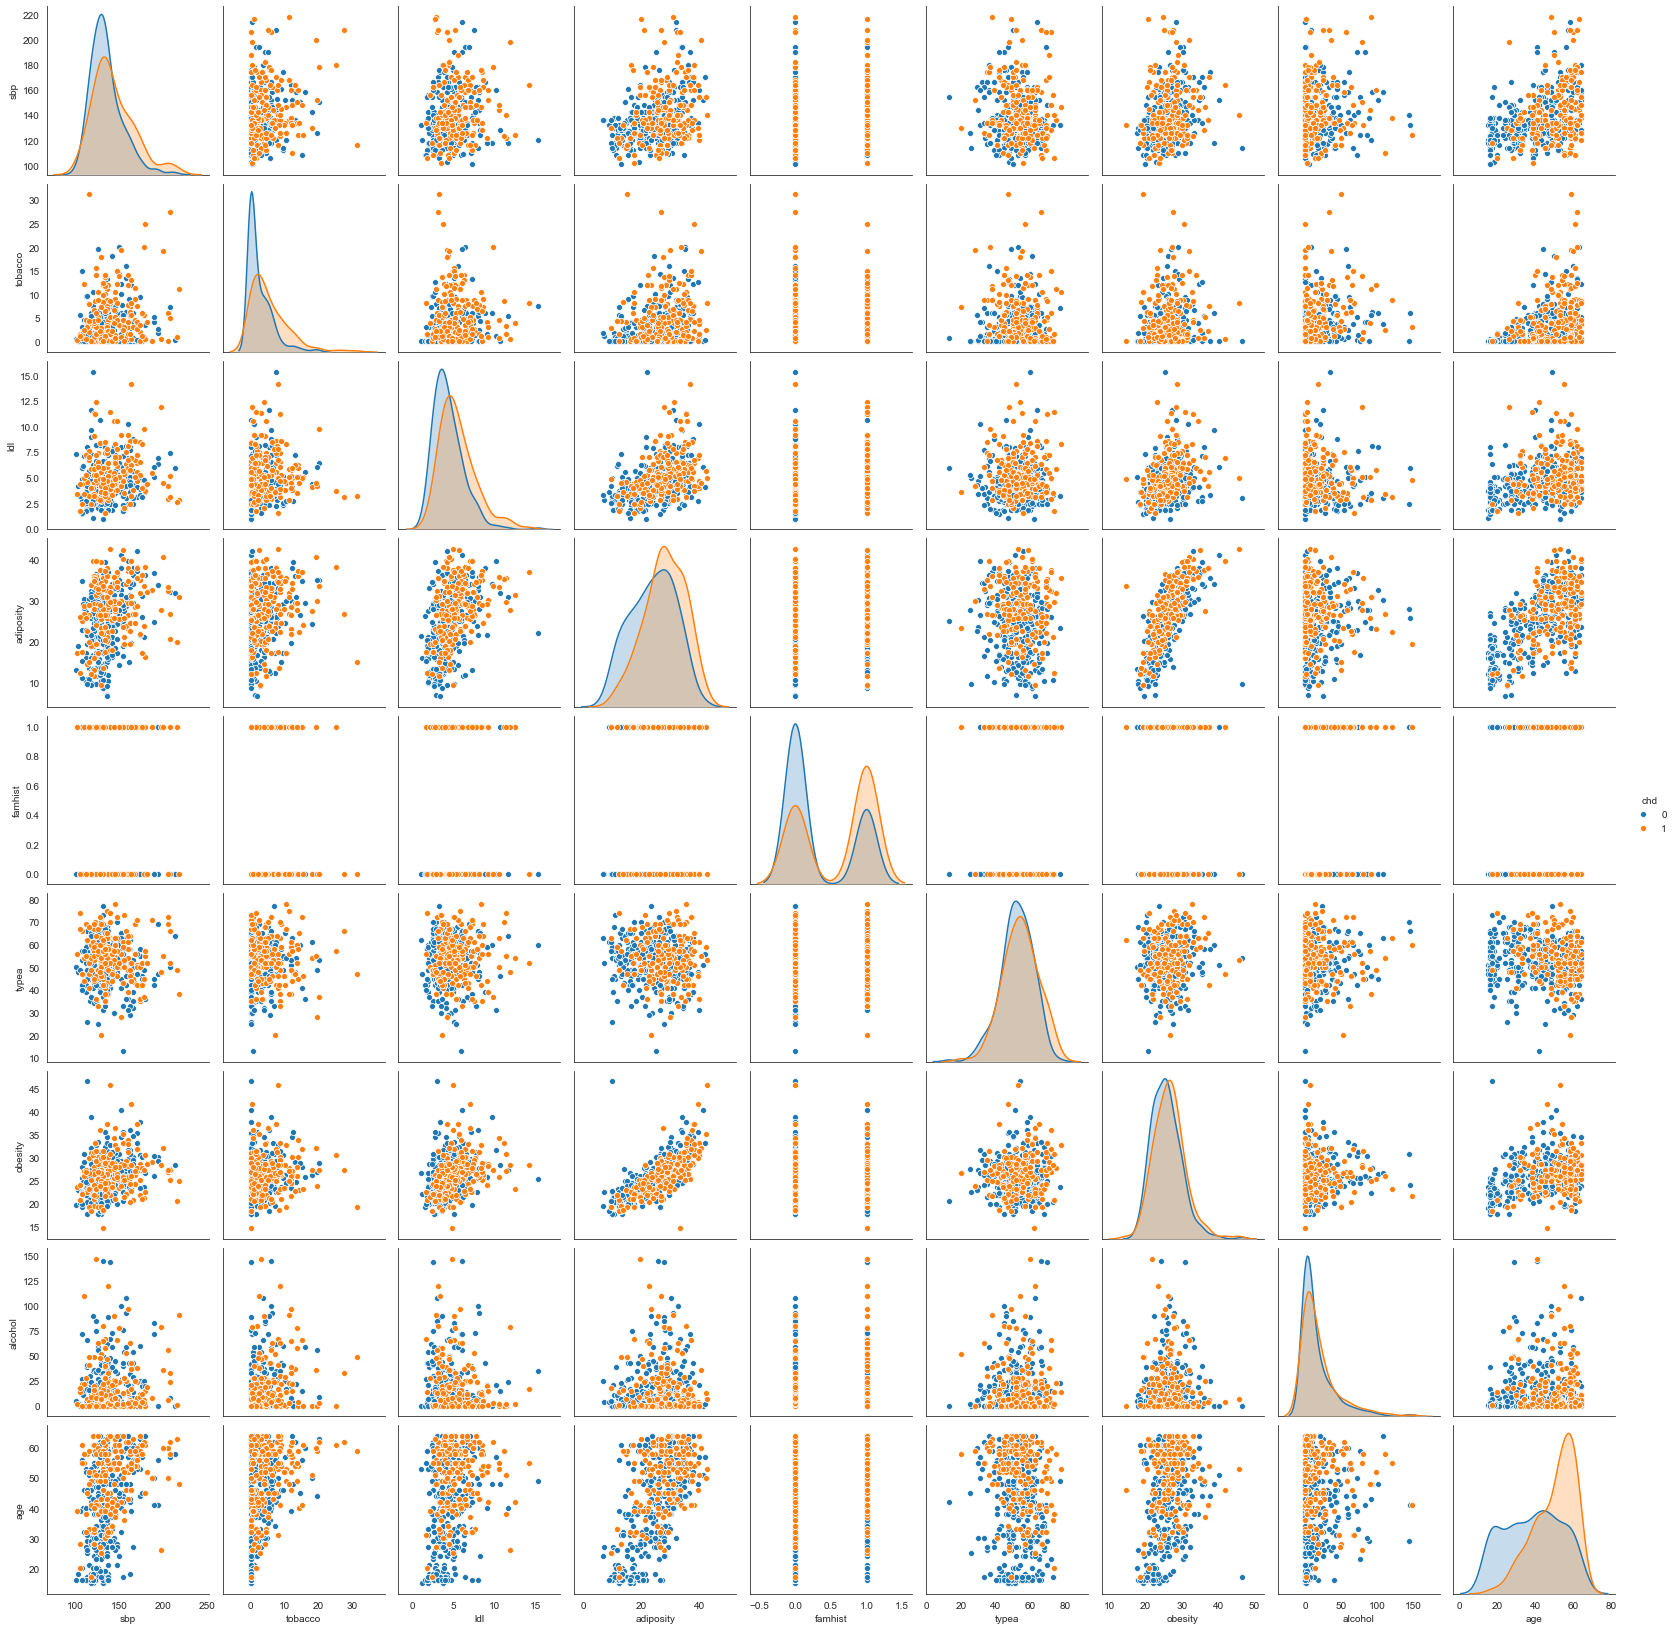

In [159]:
p=sns.pairplot(df, hue = 'chd')

## Heatmap com os valores do Coeficiente de Correlação de Pearson para o DF

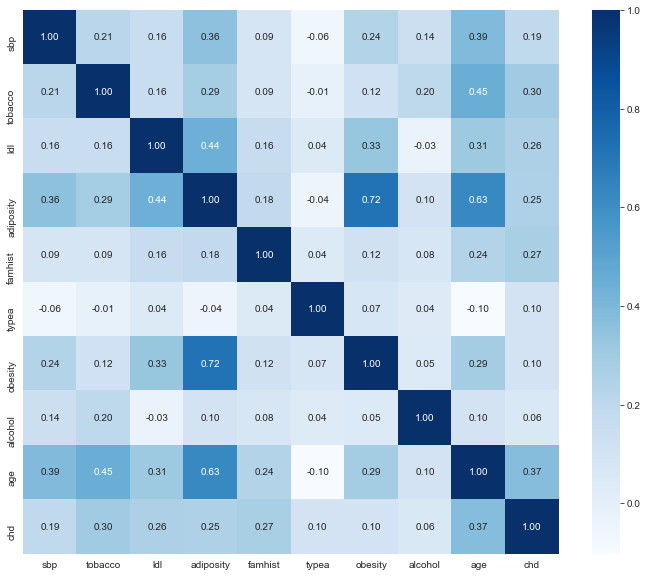

In [160]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues', fmt=".2f")

## Conclusão: Há uma baixa correlação entre chd e os demais atributos

## Agora procedemos com a normalização dos dados:

In [233]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["chd"],axis = 1),),
        columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist',
       'typea', 'obesity', 'alcohol', 'age'])
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760


In [234]:
y = df['chd']
y.head()

1    1
2    1
3    0
4    1
5    1
Name: chd, dtype: int64

## Dividindo a base em treino e teste

In [163]:
###############   STRATYF mantém a mesma proporção nos datasets de treino e teste da variável a ser predita   ############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle = True, stratify=y)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(392, 9) (70, 9) (392,) (70,)


# Exercício: Implementar o modelo de regressao SGD, naive bayes e regressão logística para identificar casos de doença do coração (CHD) com os dados da base

https://github.com/advinstai/Aprendizagem-estatistica-classificacao/blob/master/SAheart.data

faca a preparacao dos dados para utilizar os algoritmos e compare a qualidade dos 3 métodos, usando as metricas apresentadas.

Em caso de duvidas quanto ao uso do scikit learn verificar https://github.com/advinstai/Analise-Exploratoria-de-Dados

## Regressão SGD:

In [331]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [332]:
y_pred = sgd_clf.predict(X_test)
cm     = confusion_matrix(y_test, y_pred)
score  = sgd_clf.score(X_test, y_test)

#print("Confusion Matrix:\n", cm,"\n")
#print('Classification Report:\n', classification_report(y_test, y_pred))
print('     SCORES:')
print("Precision: %.1f"% (precision_score(y_test, y_pred)*100),"%")
print("Recall:    %.1f"% (recall_score(y_test, y_pred)*100),"%")
print("F1:        %.1f"% (f1_score(y_test, y_pred)*100),"%")
print("LR Score:  %.1f"% (score*100),"%")

     SCORES:
Precision: 69.6 %
Recall:    66.7 %
F1:        68.1 %
LR Score:  78.6 %


Text(0.5, 1.1, 'Confusion matrix')

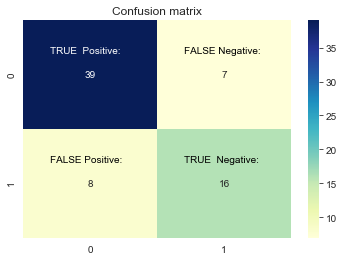

In [333]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.text(0.2, 0.3, "TRUE  Positive:", color = "w")
plt.text(1.2, 0.3, "FALSE Negative:", color = "k")
plt.text(0.2, 1.3, "FALSE Positive:", color = "k")
plt.text(1.2, 1.3, "TRUE  Negative:", color = "k")
plt.title('Confusion matrix', y=1.1)

## Naive Bayes:

In [326]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [334]:
y_pred = nb_clf.predict(X_test)
cm     = confusion_matrix(y_test, y_pred)
score  = nb_clf.score(X_test, y_test)

#print("Confusion Matrix:\n", cm,"\n")
#print('Classification Report:\n', classification_report(y_test, y_pred))
print('     SCORES:')
print("Precision: %.1f"% (precision_score(y_test, y_pred)*100),"%")
print("Recall:    %.1f"% (recall_score(y_test, y_pred)*100),"%")
print("F1:        %.1f"% (f1_score(y_test, y_pred)*100),"%")
print("LR Score:  %.1f"% (score*100),"%")

     SCORES:
Precision: 64.0 %
Recall:    66.7 %
F1:        65.3 %
LR Score:  75.7 %


Text(0.5, 1.1, 'Confusion matrix')

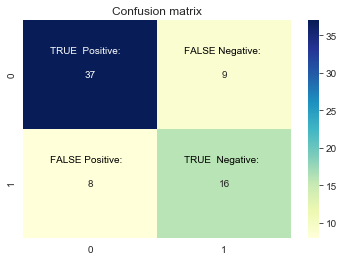

In [335]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.text(0.2, 0.3, "TRUE  Positive:", color = "w")
plt.text(1.2, 0.3, "FALSE Negative:", color = "k")
plt.text(0.2, 1.3, "FALSE Positive:", color = "k")
plt.text(1.2, 1.3, "TRUE  Negative:", color = "k")
plt.title('Confusion matrix', y=1.1)

## Regressão Logística:

In [336]:
lr_clf = LogisticRegression(max_iter=2000)
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [337]:
y_pred = lr_clf.predict(X_test)
cm     = confusion_matrix(y_test, y_pred)
score  = lr_clf.score(X_test, y_test)

#print("Confusion Matrix:\n", cm,"\n")
#print('Classification Report:\n', classification_report(y_test, y_pred))
print('     SCORES:')
print("Precision: %.1f"% (precision_score(y_test, y_pred)*100),"%")
print("Recall:    %.1f"% (recall_score(y_test, y_pred)*100),"%")
print("F1:        %.1f"% (f1_score(y_test, y_pred)*100),"%")
print("LR Score:  %.1f"% (score*100),"%")

     SCORES:
Precision: 68.2 %
Recall:    62.5 %
F1:        65.2 %
LR Score:  77.1 %


Text(0.5, 1.1, 'Confusion matrix')

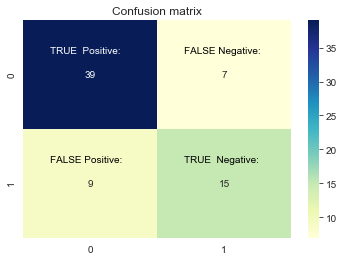

In [338]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.text(0.2, 0.3, "TRUE  Positive:", color = "w")
plt.text(1.2, 0.3, "FALSE Negative:", color = "k")
plt.text(0.2, 1.3, "FALSE Positive:", color = "k")
plt.text(1.2, 1.3, "TRUE  Negative:", color = "k")
plt.title('Confusion matrix', y=1.1)